In [5]:
#IMPORT LIBRARIES

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#metric/stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (accuracy_score, classification_report,recall_score, precision_score, f1_score,confusion_matrix)

#models
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
print("HEllo")

HEllo


In [7]:


import plotly.express as px
import plotly.offline as py 
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# for statistics and metrics
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)


In [8]:
#READ DATASET

df = pd.read_csv("https://raw.githubusercontent.com/visalakshi2001/rta-severity-prediction/main/RTA%20Dataset.csv")
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


# DATA ANALYSIS OR EDA



In [9]:
df.shape

(12316, 32)

In [10]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [11]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [13]:
df.describe(include=['O']).T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


In [14]:
df.duplicated().sum()

0

In [15]:
df.nunique()

Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [16]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [17]:
#Summary of our data
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 12316
Columns  : 32

Features :
     : ['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']

Missing values    : 20057

Unique values :  
 Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driv

In [18]:
#Finding the categorical values
df.select_dtypes(exclude=['int','float']).columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

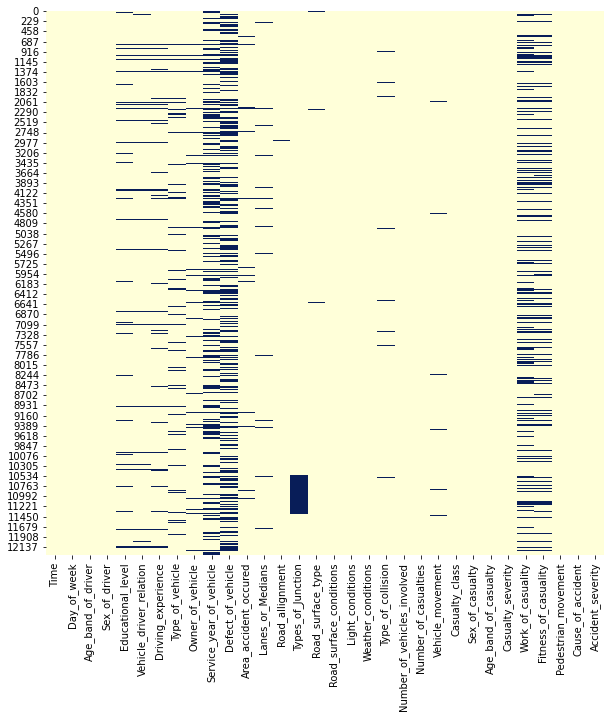

In [19]:
#Displaying the missing values
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False,cmap='YlGnBu')
plt.ioff()

In [20]:
#Here we can see how much percentage of data is missing in each features.
vars_with_na=[var for var in df.columns if df[var].isnull().sum()>1]

for var in vars_with_na:
    print(var,np.round(df[var].isnull().mean(),2),'% missing values')

Educational_level 0.06 % missing values
Vehicle_driver_relation 0.05 % missing values
Driving_experience 0.07 % missing values
Type_of_vehicle 0.08 % missing values
Owner_of_vehicle 0.04 % missing values
Service_year_of_vehicle 0.32 % missing values
Defect_of_vehicle 0.36 % missing values
Area_accident_occured 0.02 % missing values
Lanes_or_Medians 0.03 % missing values
Road_allignment 0.01 % missing values
Types_of_Junction 0.07 % missing values
Road_surface_type 0.01 % missing values
Type_of_collision 0.01 % missing values
Vehicle_movement 0.03 % missing values
Work_of_casuality 0.26 % missing values
Fitness_of_casuality 0.21 % missing values


Our Target in this dataset is to find the Accident Severity 

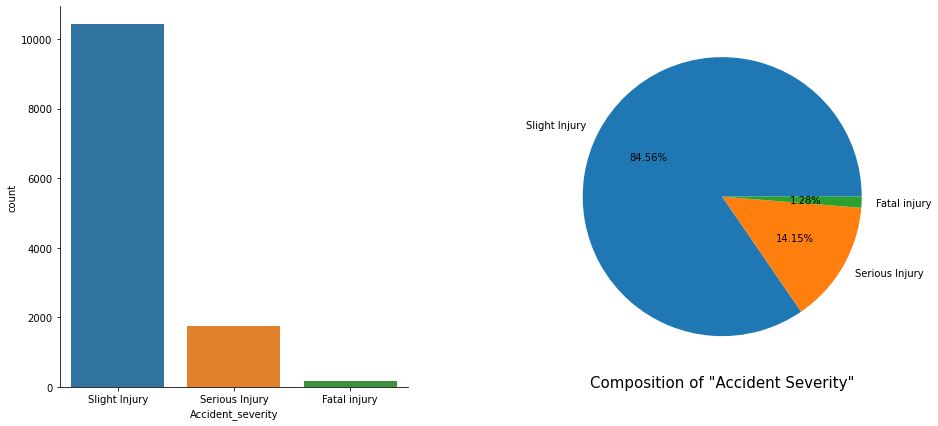

In [21]:
#Plotting accident severity

plt.figure(figsize=(15,7))
subplot1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["Accident_severity"])
sns.despine(top=True, right=True)
subplot2 = plt.subplot(1,2,2)
plt.pie(df["Accident_severity"].value_counts(), labels=list(df["Accident_severity"].unique()), autopct='%1.2f%%')
plt.xlabel('Composition of "Accident Severity"', fontsize=15)
plt.subplots_adjust(wspace=0.4)
plt.show()

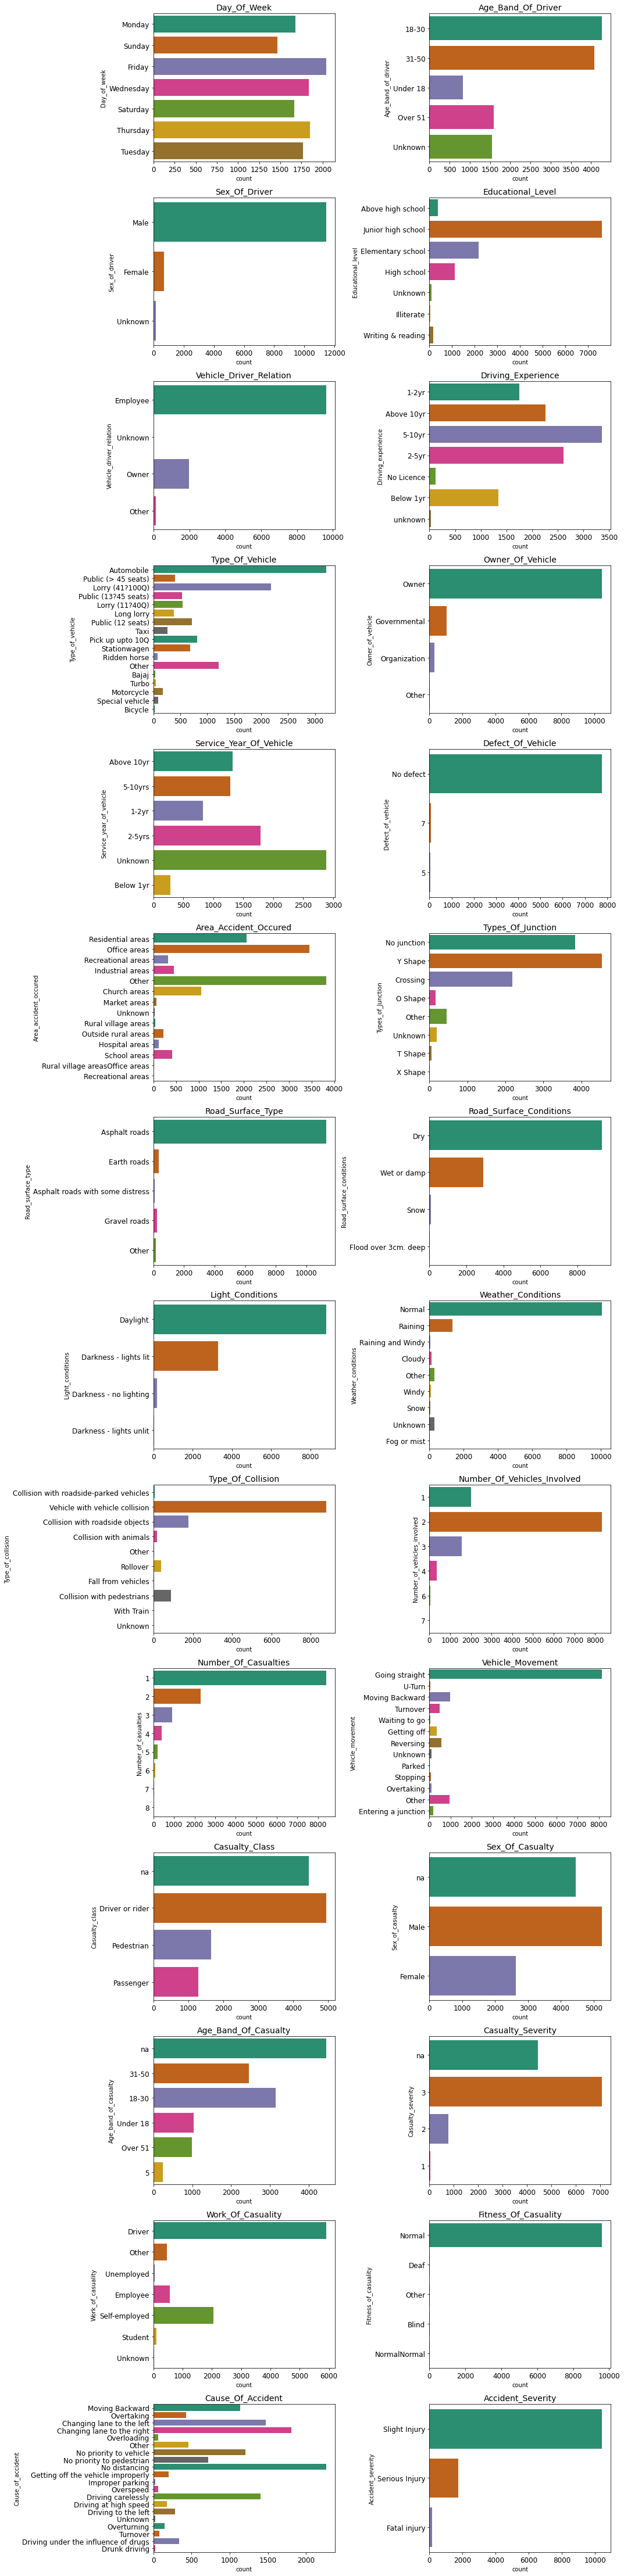

In [22]:
plt.figure(figsize=(15,70))
plotnumber =1 

for col in df.drop(['Time','Lanes_or_Medians','Pedestrian_movement','Road_allignment'],axis=1):
  if (plotnumber <= df.shape[1]):
     ax1 = plt.subplot(16,2,plotnumber)
     sns.countplot(data=df, y=col, palette='Dark2')
     plt.xticks(fontsize=12)
     plt.yticks(fontsize=12)
     plt.title(col.title(), fontsize=14)
  plotnumber+=1
plt.tight_layout()


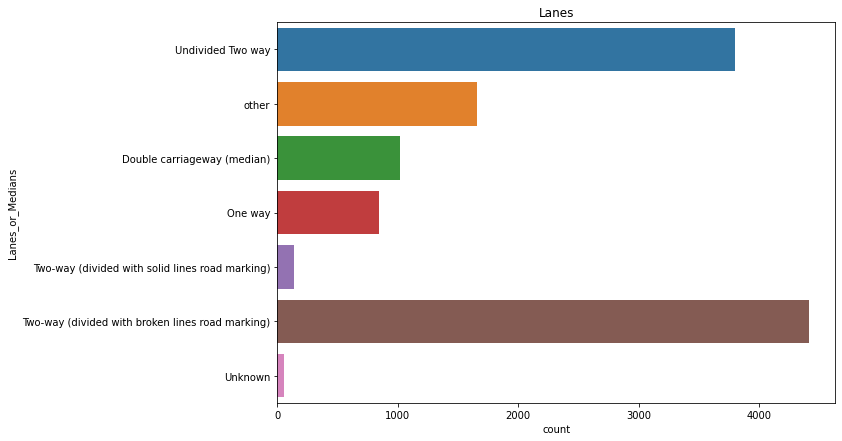

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, y='Lanes_or_Medians')
plt.title('Lanes')
plt.show()

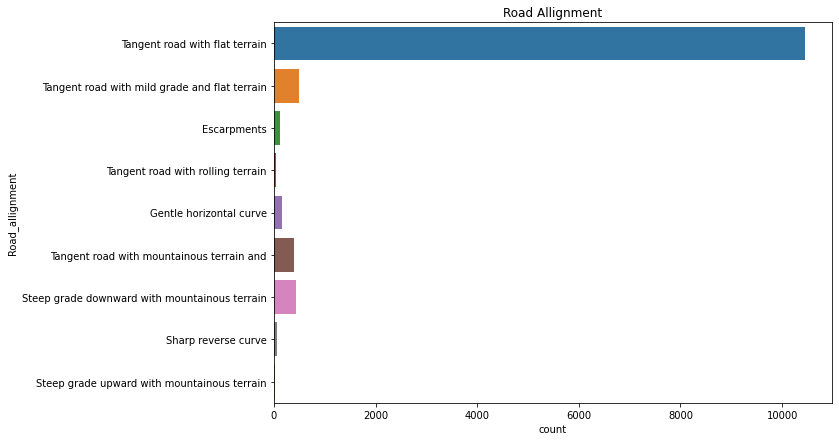

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, y='Road_allignment')
plt.title('Road Allignment')
plt.show()

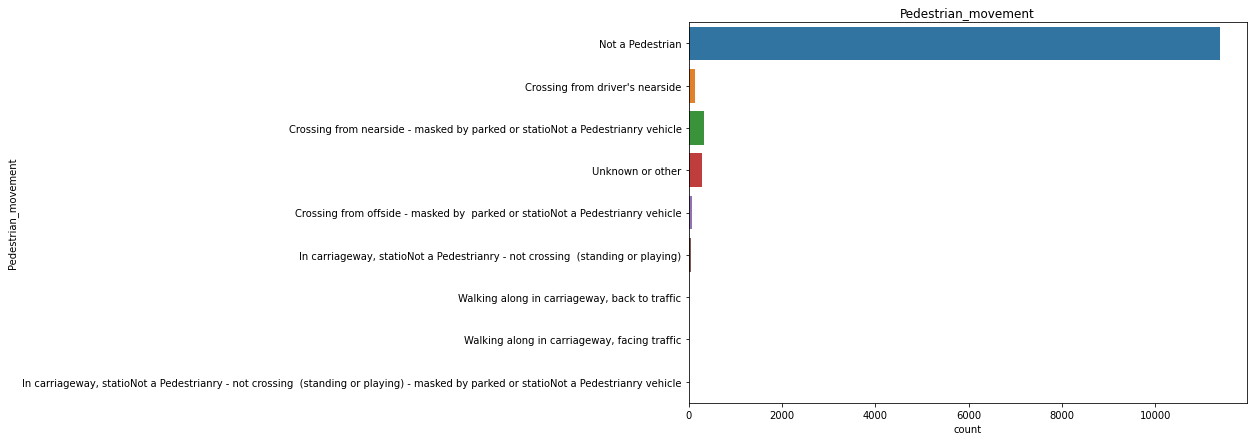

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, y='Pedestrian_movement')
plt.title('Pedestrian_movement')
plt.show()

In [26]:
df['Time'] = pd.to_datetime(df['Time'])
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df.drop('Time', axis=1, inplace=True)

In [27]:
df.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'hour', 'minute'],
      dtype='object')

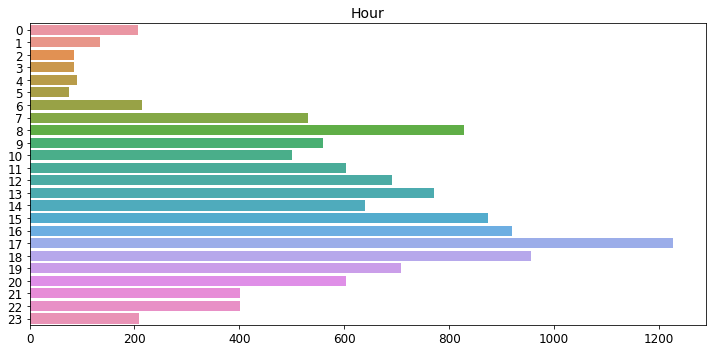

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

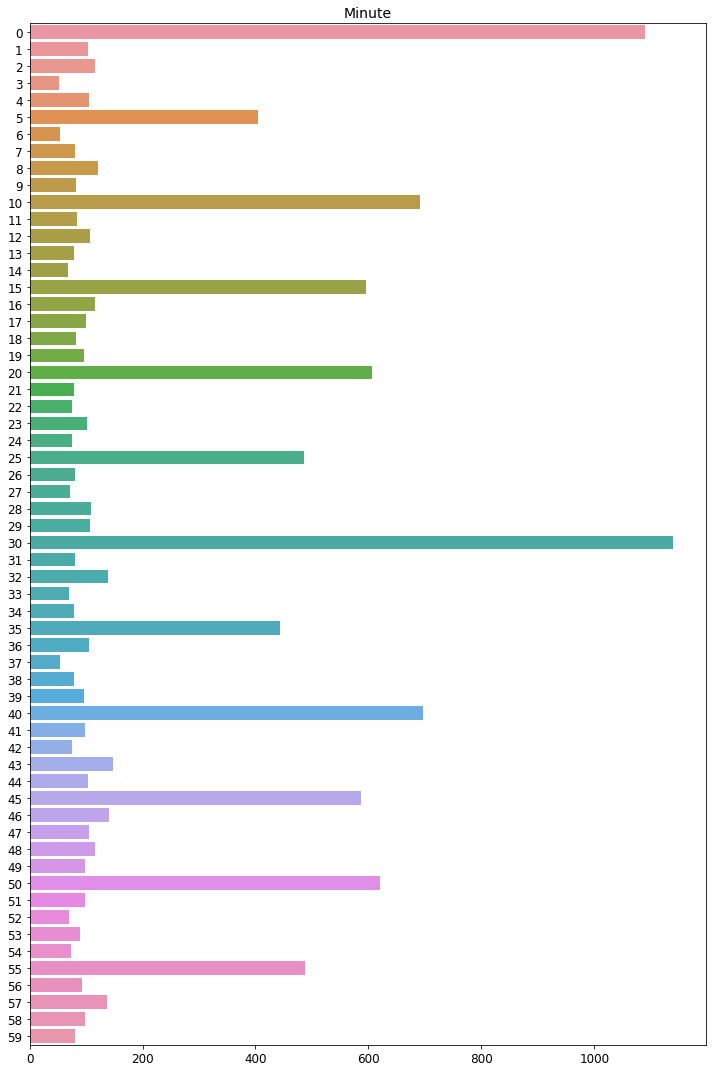

In [29]:
plt.figure(figsize=(10,15))
sns.countplot(data=df, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



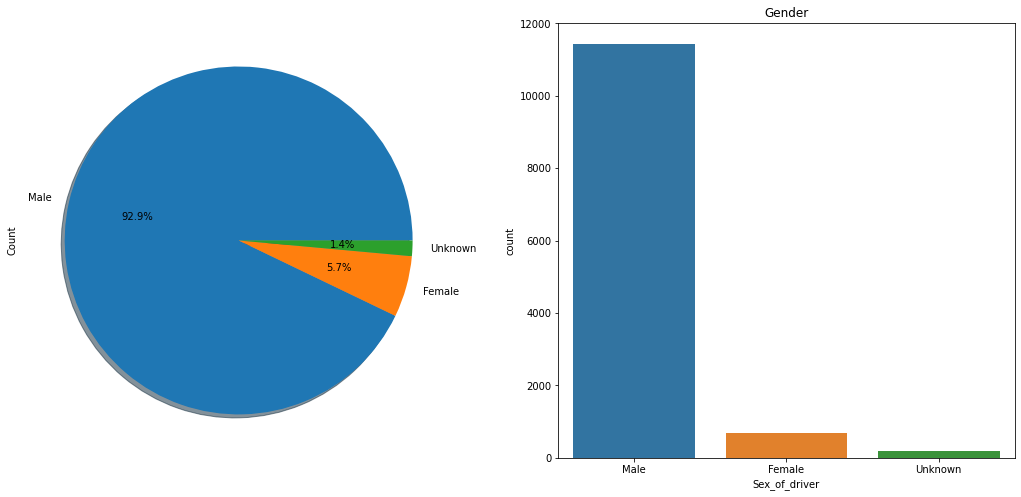

In [30]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Sex_of_driver'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_ylabel('Count')
sns.countplot('Sex_of_driver',data=df,ax=ax[1],order=df['Sex_of_driver'].value_counts().index)
ax[1].set_title('Gender')
plt.show()

[]

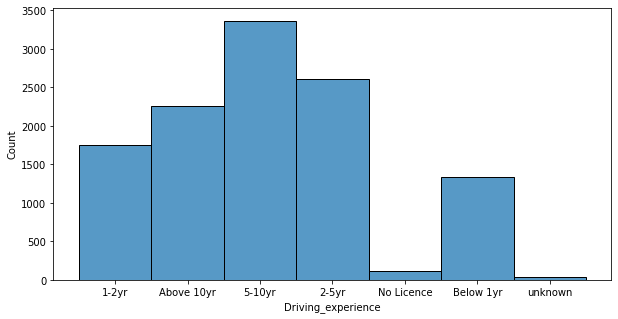

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df['Driving_experience'],bins=10)
plt.plot()


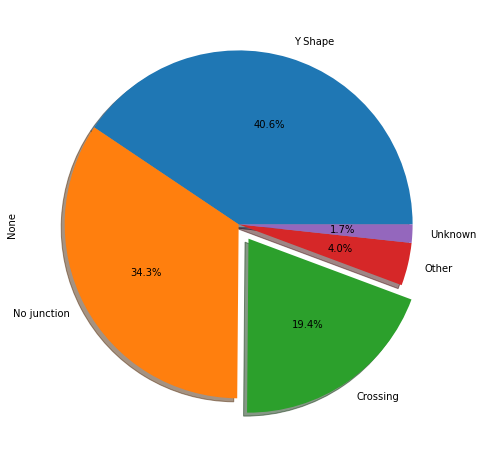

In [32]:
plt.figure(figsize=(14,8))
df.groupby('Types_of_Junction') \
        .size() \
        .sort_values(ascending = False) \
        .iloc[:5] \
        .plot.pie(explode=[0,0,0.1,0,0],autopct='%1.1f%%',shadow=True)
plt.ioff()

OBSERVATIONS:

1.The data that we have has a lot of null values so that has to be rectified which will be done in preprocessing.

2.92.9% of the accidents were done by men and 5.7% were women.

3.Most of the drivers have met with accident on with 
   #Two lanes
   #tangent road with flat terrains
   #asphalt roads
   #day time
   #normal weather conditions

3.Many accidents occured on Friday and between 3-8 pm and many at 5 pm,this maybe because many people leave for home during this time period.

4.Majority of the accidents are on the following conditions:
  #vehicle to vehicle collision
  #straight movement
  #no pedestrian accidents
  


*Now we'll move on to preprocessing*

Here we'll see which features are relevant to our target.

Fix missing values


#PRE-PROCESSING


In [33]:
# renaming columns
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
df.rename(columns=col_map, inplace=True)

In [34]:
df.isna().sum()[df.isna().sum() !=0]

educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
collision_type              155
vehicle_movement            308
casualty_work              3198
casualty_fitness           2635
dtype: int64

In [35]:
imputed_columns = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in imputed_columns:
  mode = df[feat].mode()[0]
  df[feat].fillna(mode,inplace =True)

In [36]:
df.isna().sum()

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
vehicle_driver_relation    0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
vehicle_defect             0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
casualty_work              0
casualty_fitness           0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
minute                     0
dtype: int64

In [37]:
#ENCODING
def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(1+np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df
df = ordinal_encoder(df, df.drop(['accident_severity'], axis=1).columns)
df.shape


(12316, 33)

In [38]:
df

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,2,1,2,1,1,1,1,4,4,3,...,3,6,4,1,3,6,10,Slight Injury,18,3
1,2,2,2,5,1,4,12,4,3,3,...,3,6,4,1,3,6,17,Slight Injury,18,3
2,2,1,2,5,1,1,6,4,6,3,...,2,2,3,1,3,6,1,Serious Injury,18,3
3,4,1,2,5,1,3,12,1,6,3,...,1,1,3,1,3,6,2,Slight Injury,2,7
4,4,1,2,5,1,2,1,4,3,3,...,3,6,4,1,3,6,17,Slight Injury,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,7,2,2,5,1,2,5,4,6,3,...,3,6,4,1,3,6,11,Slight Injury,17,16
12312,4,5,2,2,1,3,1,4,6,3,...,3,6,4,1,3,6,11,Slight Injury,19,1
12313,4,3,2,5,1,3,2,4,2,3,...,2,2,3,1,3,6,2,Serious Injury,14,56
12314,4,1,1,5,1,4,6,4,2,3,...,3,6,4,1,3,6,6,Slight Injury,14,56


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



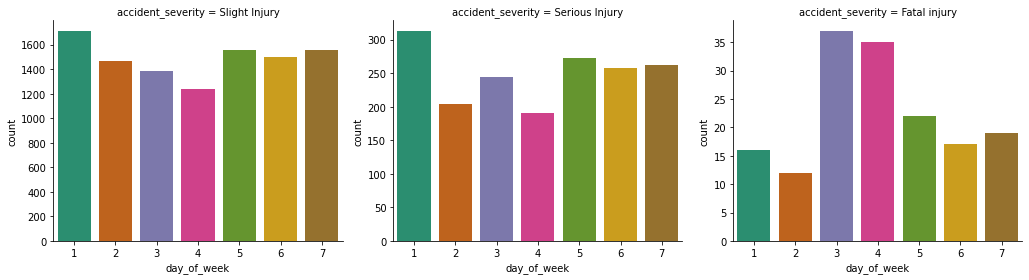

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



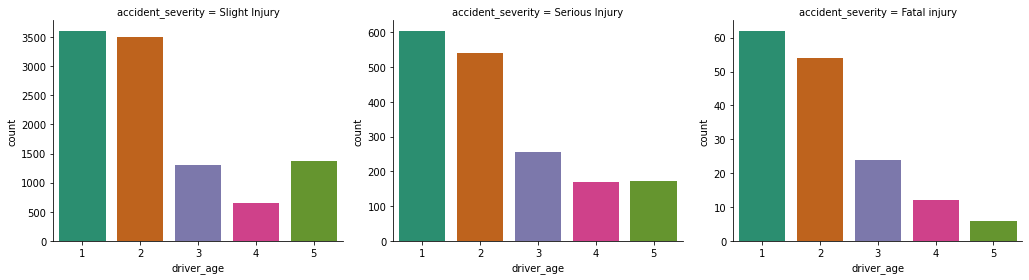

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



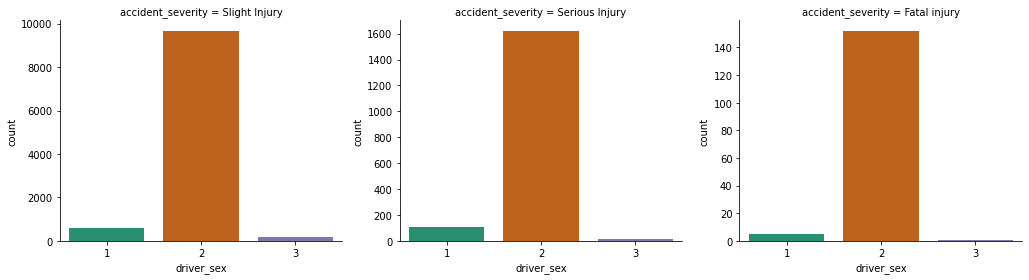

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



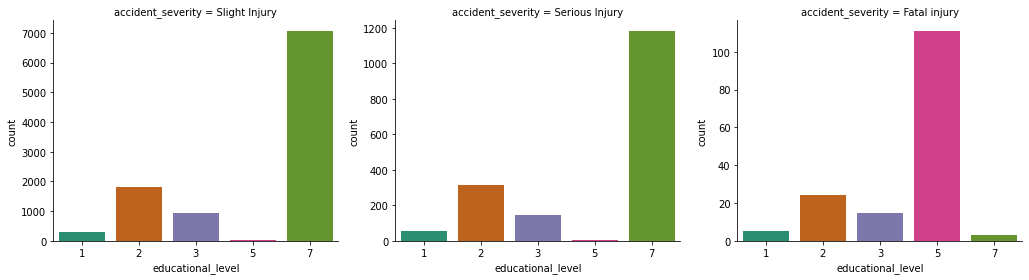

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



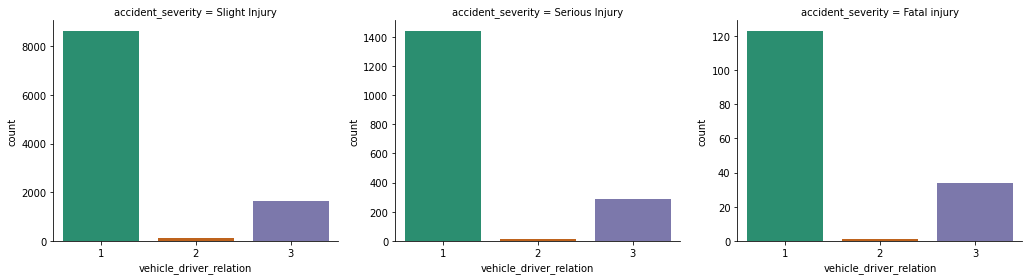

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



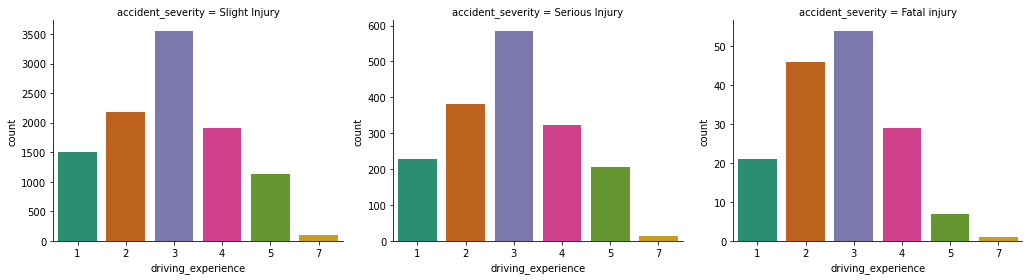

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



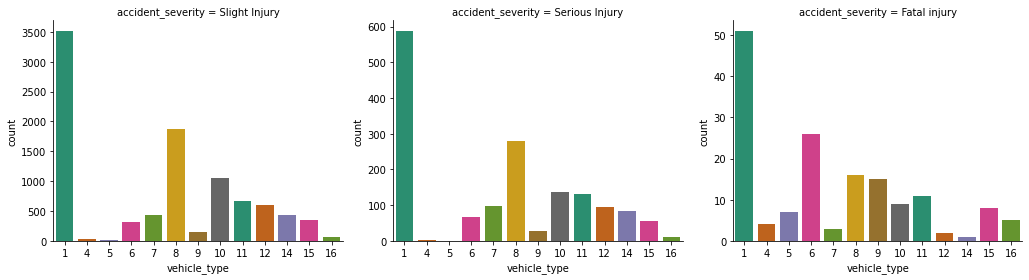

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



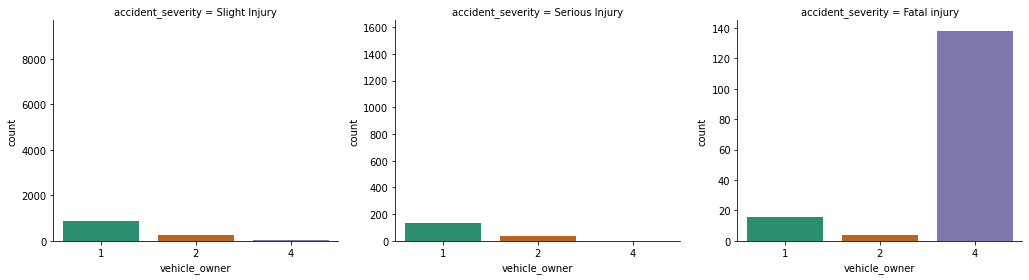

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



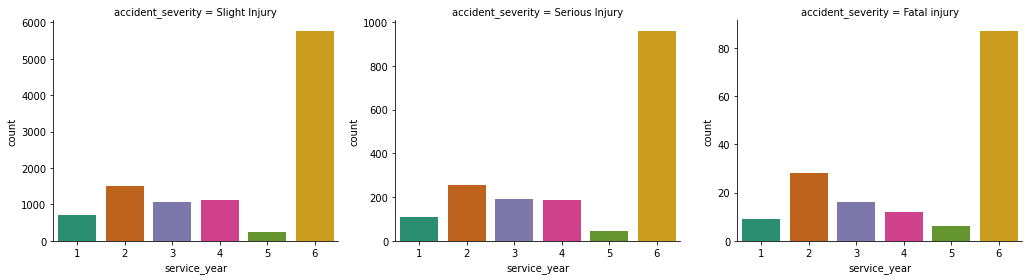

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



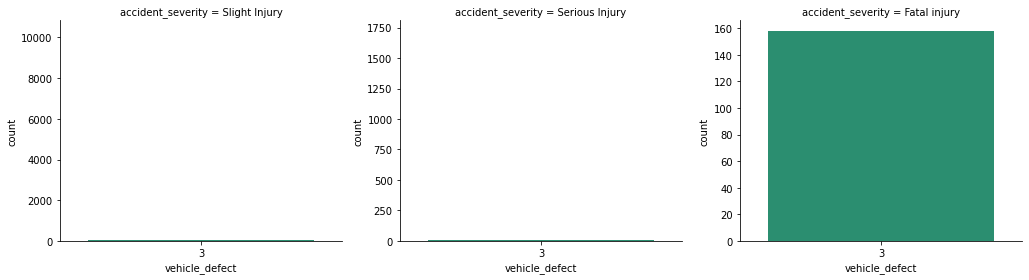

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



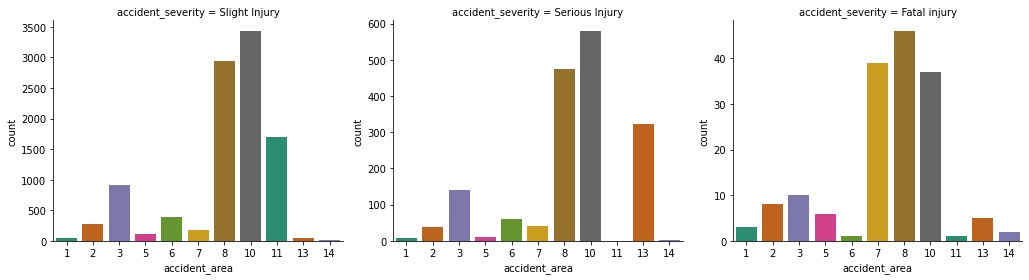

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



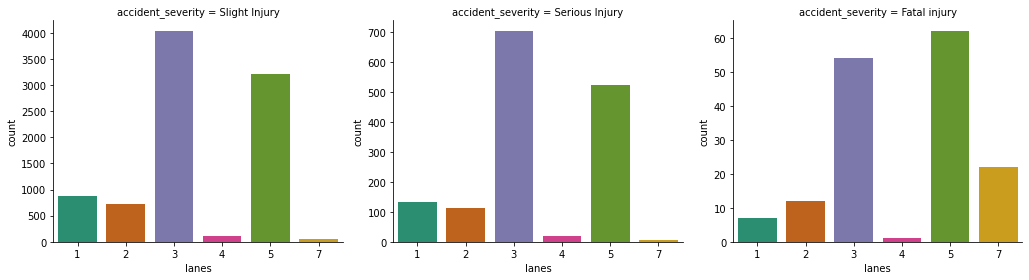

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



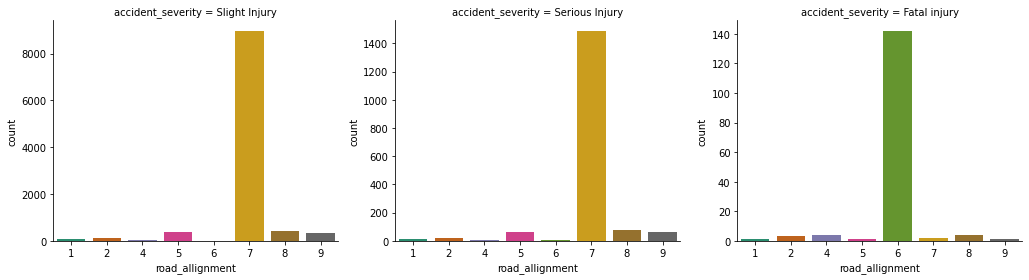

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



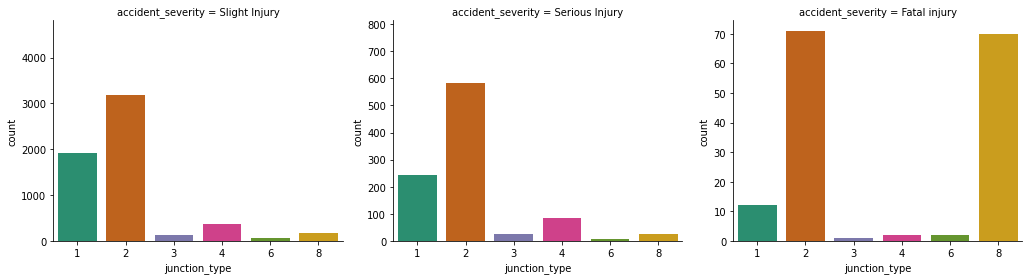

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



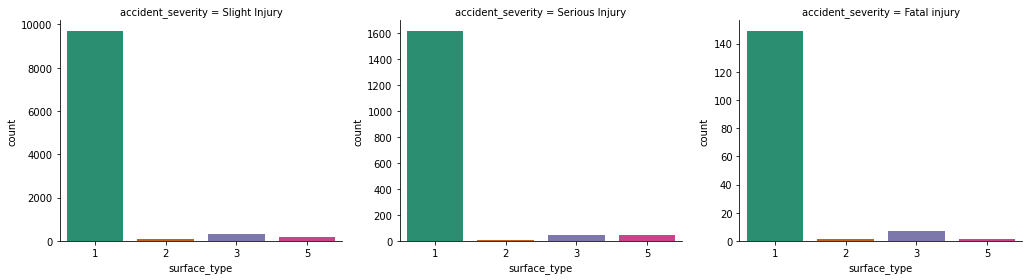

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



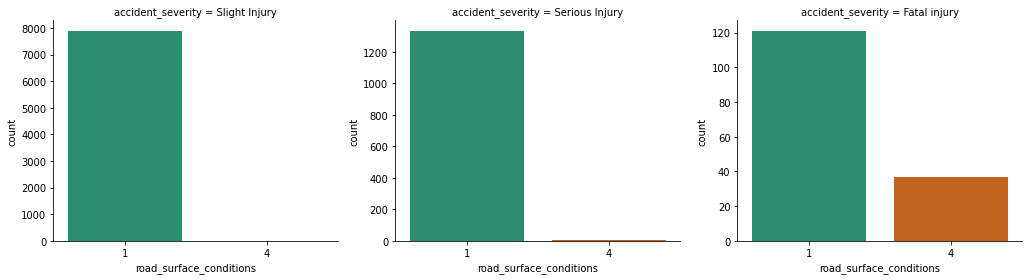

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



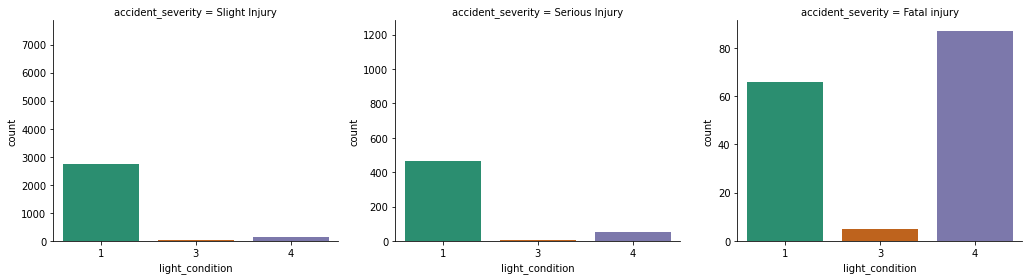

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



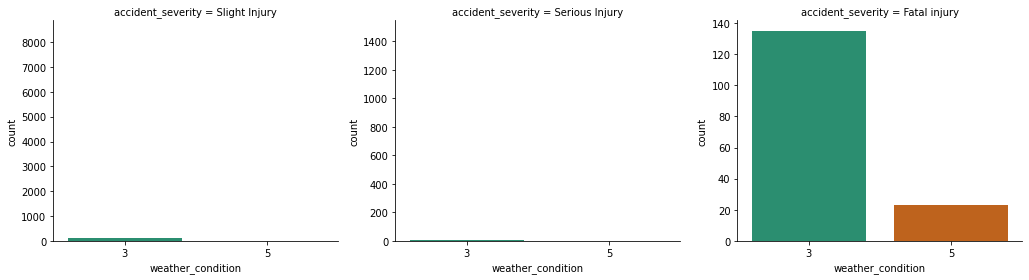

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



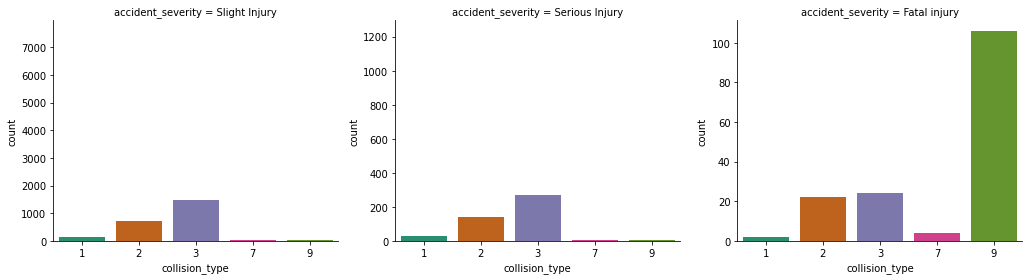

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



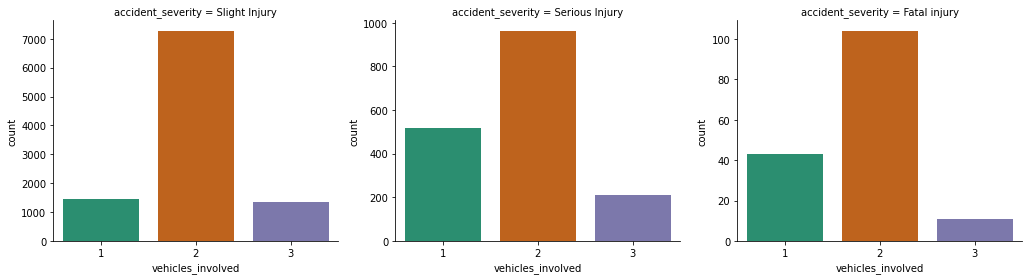

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



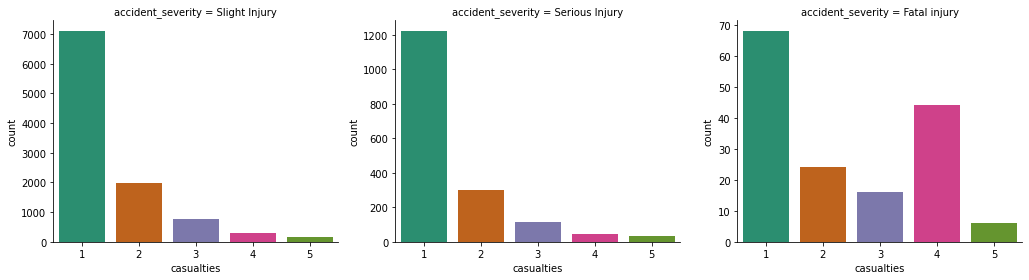

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



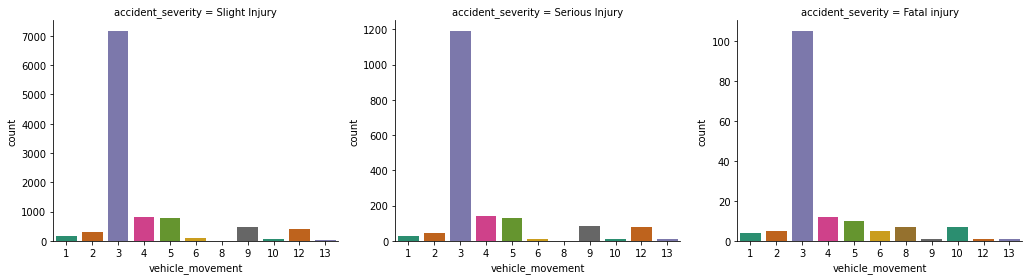

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



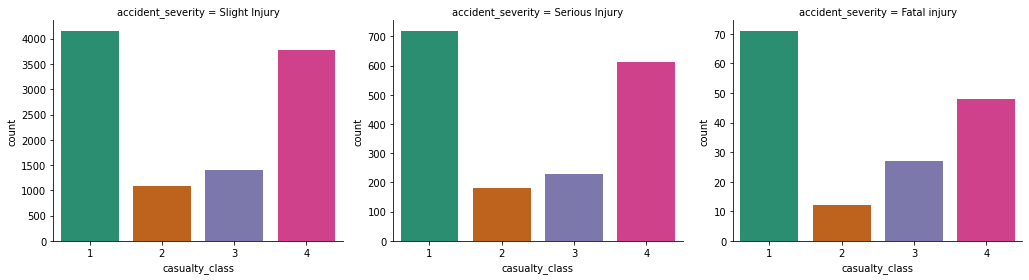

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



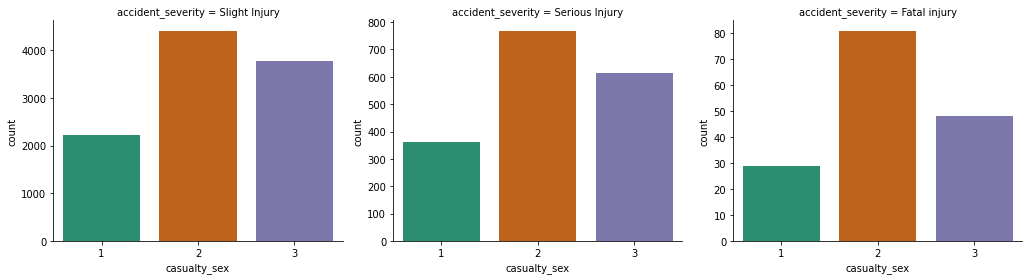

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



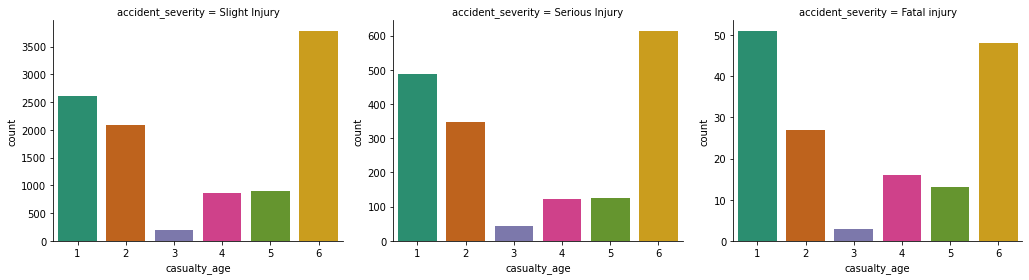

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



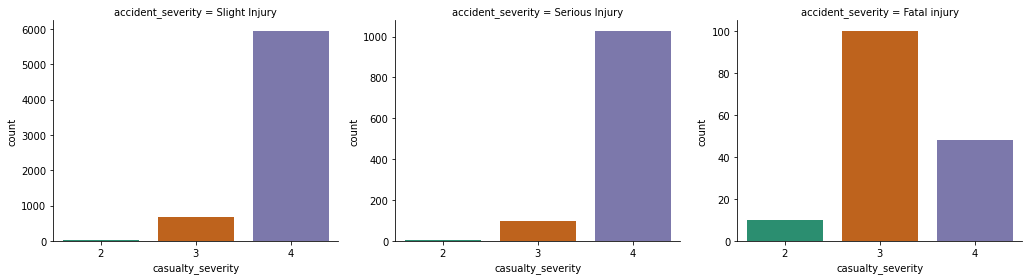

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



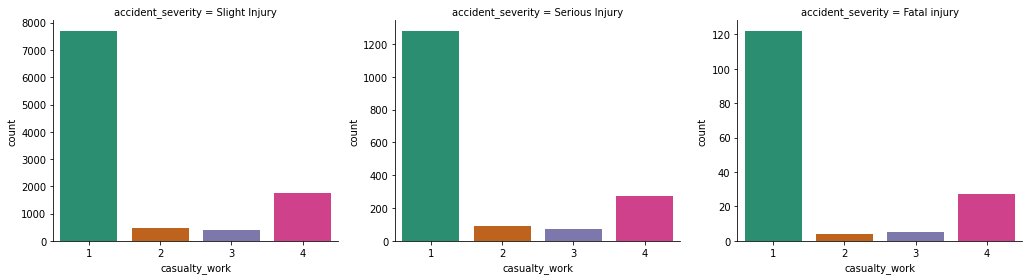

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



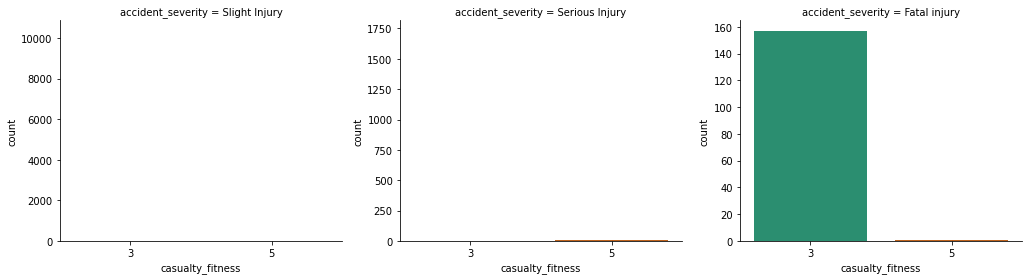

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



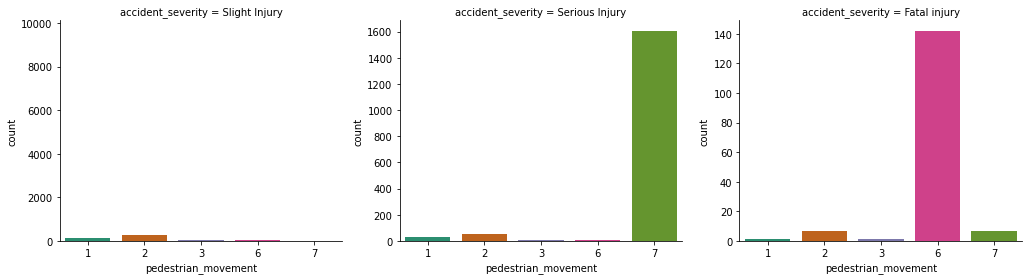

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



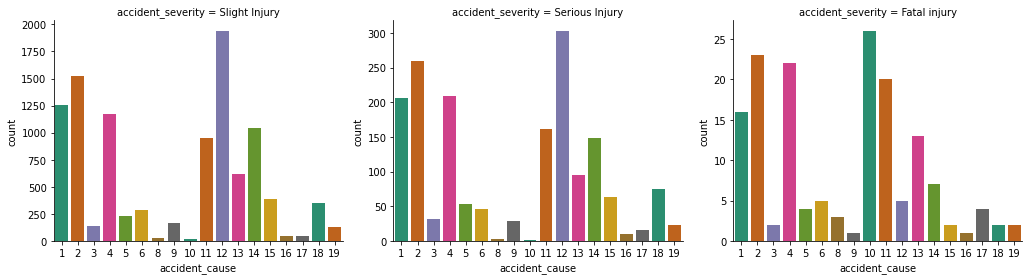

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



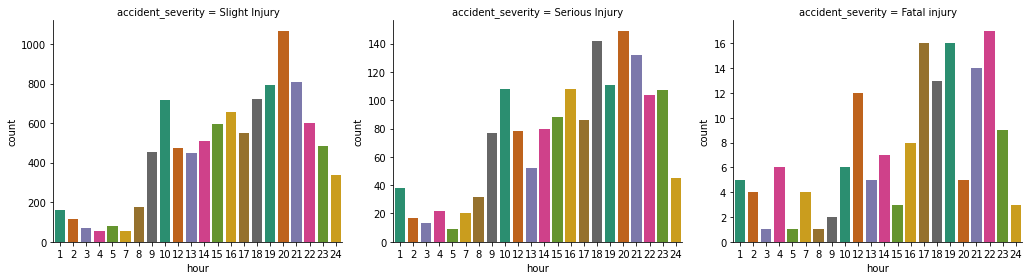

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



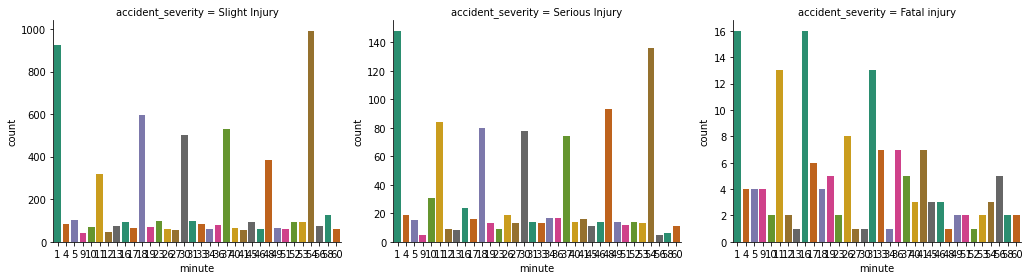

In [39]:
for col in df.drop('accident_severity', axis=1):
    g = sns.FacetGrid(df, col='accident_severity', height=4, aspect=1.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

<AxesSubplot:>

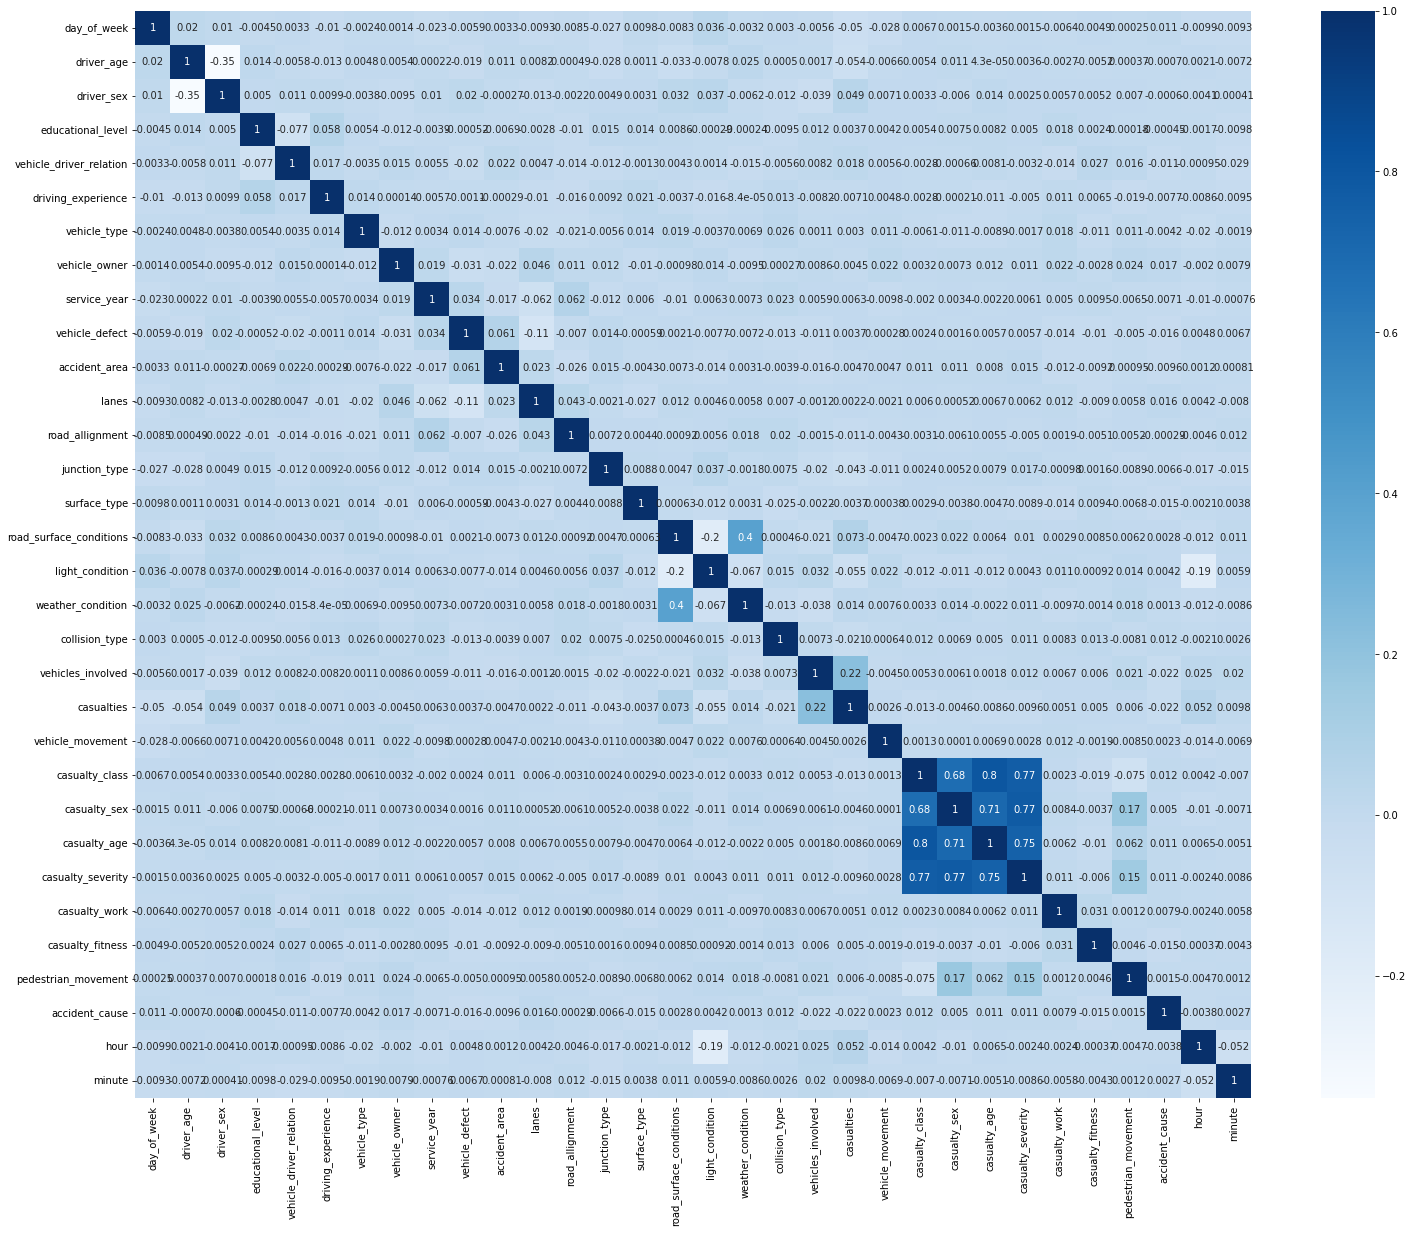

In [40]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot = True ,cmap = 'Blues')

In [41]:
df.corr()

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,hour,minute
day_of_week,1.000000,0.019993,0.009986,-0.004517,0.003303,-0.010062,-0.002417,0.001417,-0.022951,-0.005889,...,0.006661,0.001461,-0.003642,0.001512,-0.006368,0.004884,0.000250,0.010516,-0.009914,-0.009277
driver_age,0.019993,1.000000,-0.351878,0.013613,-0.005841,-0.013407,0.004830,0.005405,0.000220,-0.018992,...,0.005386,0.011358,0.000043,0.003565,-0.002739,-0.005154,0.000372,-0.000703,0.002069,-0.007233
driver_sex,0.009986,-0.351878,1.000000,0.004967,0.011035,0.009855,-0.003757,-0.009489,0.010349,0.020155,...,0.003335,-0.006046,0.014191,0.002474,0.005684,0.005187,0.006981,-0.000598,-0.004134,0.000412
educational_level,-0.004517,0.013613,0.004967,1.000000,-0.076866,0.057625,0.005447,-0.012486,-0.003894,-0.000522,...,0.005382,0.007483,0.008226,0.004950,0.017891,0.002357,0.000177,-0.000451,-0.001659,-0.009783
vehicle_driver_relation,0.003303,-0.005841,0.011035,-0.076866,1.000000,0.016686,-0.003481,0.014860,0.005514,-0.020240,...,-0.002817,-0.000664,0.008115,-0.003230,-0.014366,0.026802,0.015803,-0.010753,-0.000949,-0.028696
driving_experience,-0.010062,-0.013407,0.009855,0.057625,0.016686,1.000000,0.014333,0.000144,-0.005653,-0.001149,...,-0.002783,-0.000214,-0.010891,-0.004952,0.011090,0.006533,-0.018790,-0.007728,-0.008570,-0.009503
vehicle_type,-0.002417,0.004830,-0.003757,0.005447,-0.003481,0.014333,1.000000,-0.012463,0.003448,0.014329,...,-0.006116,-0.011247,-0.008934,-0.001679,0.018447,-0.010617,0.010500,-0.004200,-0.020264,-0.001948
vehicle_owner,0.001417,0.005405,-0.009489,-0.012486,0.014860,0.000144,-0.012463,1.000000,0.019384,-0.031480,...,0.003196,0.007335,0.011667,0.010517,0.021718,-0.002819,0.023517,0.016550,-0.001988,0.007896
service_year,-0.022951,0.000220,0.010349,-0.003894,0.005514,-0.005653,0.003448,0.019384,1.000000,0.033818,...,-0.001983,0.003409,-0.002169,0.006072,0.005049,0.009474,-0.006498,-0.007146,-0.010464,-0.000763
vehicle_defect,-0.005889,-0.018992,0.020155,-0.000522,-0.020240,-0.001149,0.014329,-0.031480,0.033818,1.000000,...,0.002376,0.001566,0.005724,0.005710,-0.013606,-0.010003,-0.004957,-0.015714,0.004772,0.006668


# Upsampling

In [42]:
X = df.drop('accident_severity',axis = 1)
Y = df['accident_severity']

X_train,X_test,Y_train,Y_test = train_test_split(X , Y, test_size=0.3,random_state =42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(8621, 32) (3695, 32) (8621,) (3695,)


In [43]:
# upsampling using smote

counter = Counter(Y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(Y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

counter = Counter(Y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(Y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, Y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 32) (21972,)


In [44]:
#ENCODING TARGET

Y_test = ordinal_encoder(pd.DataFrame(Y_test, columns = ['accident_severity']), pd.DataFrame(Y_test, columns = ['accident_severity']).columns)['accident_severity']
Y_train = ordinal_encoder(pd.DataFrame(Y_train, columns = ['accident_severity']), pd.DataFrame(Y_train, columns = ['accident_severity']).columns)['accident_severity']

In [45]:
Y_test

4281     3
4010     3
1022     2
8775     3
10000    3
        ..
9855     3
7302     2
9023     3
7936     3
438      3
Name: accident_severity, Length: 3695, dtype: int32

# Modelling

In [46]:
def modelling(X_train, Y_train, X_test, Y_test, **kwargs):
    scores = {}
    models = []
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(Y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(Y_test, y_pred)]
#         scores['xgb']['roc_auc'] = roc_auc_score(y_test, y_pred)

    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, Y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(Y_test, y_pred)]
#         scores['rf']['roc_auc'] = roc_auc_score(y_test, y_pred)
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, Y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(Y_test, y_pred)]
#         scores['extree']['roc_auc'] = roc_auc_score(y_test, y_pred)
        models.append(extree)
        
    return scores

In [47]:
modelling(X_train,Y_train, X_test, Y_test, xgb=True, rf=True, extree=True)

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'xgb': [0.804871447902571],
 'rf': [0.8021650879566983],
 'extree': [0.8127198917456022]}

In [48]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [49]:
extree = ExtraTreesClassifier()
extree.fit(X_train, Y_train)
y_pred = extree.predict(X_test)

In [50]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [51]:
model_performance(extree,Y_test,y_pred)

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# Hyperparameter Tuning


In [52]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=Y_train)

# A parameter grid for XGBoost
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    cv=gkf,
)

extree_model = gsearch.fit(X=X_train, y=Y_train)
(gsearch.best_params_, gsearch.best_score_)

({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 3,
  'n_estimators': 300},
 0.8637578025679117)

In [53]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=Y_train)

params2 = {
    'n_estimators': range(400, 800, 100),
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3,
                                n_estimators = 400)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_train, y=Y_train)

final_model = gsearch.best_estimator_
(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'class_weight': None,
  'max_depth': 15,
  'min_samples_split': 2,
  'n_estimators': 700},
 0.9235603276657597)

In [54]:
extree_tuned = ExtraTreesClassifier(class_weight= 'balanced',max_depth = 15,min_samples_split= 2,n_estimators=700,ccp_alpha = 0.0,criterion = 'gini')

extree_tuned.fit(X_train,Y_train)
tuned_prediction = extree_tuned.predict(X_test)

In [ ]:
import joblib
joblib.dump(extree_tuned,'model.pkl')
